In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filepath =  'C:\\Data_Python\\data\\DataKit\\' 
#filein_nss = 'nss.sav'
#fileout_nss = 'nss.csv'
filein_dis_work='dis_work.csv'
#filein_gen_work='gen_work.csv'  cannot be used as this is not at state level. instead this is at specific/major city level
filein_dis_type_edu_lvl='dis_type_Edu_lvl.csv'
#filein_test = 'test.sav'
#fileout_test = 'test.csv'
fileout_dis_merge ='dis_merged.csv'

In [199]:
#df = pd.read_spss(filepath+filein_nss)
#df.to_csv(filepath+fileout_nss, encoding = "utf-8-sig")

In [2]:
df_dis_work = pd.read_csv(filepath+filein_dis_work)
#df_gen_work = pd.read_csv(filepath+filein_gen_work)
df_dis_type_edu_lvl = pd.read_csv(filepath+filein_dis_type_edu_lvl)

In [3]:
#filtered the dis_work  file to exclude the 'total' level rows. 
df_dis_work_f = df_dis_work[(df_dis_work['Total_Rural_Urban'] !='Total') & (df_dis_work['Disability'] !='Total') & (df_dis_work['Age']!='Total' )]

In [4]:
#aggregated the dis_work file to state level. 
df_dis_work_a = df_dis_work_f.groupby(['Area Name','Total_Rural_Urban']).sum(numeric_only=True).reset_index()

In [6]:
df_dis_work_a.head(5)

,Area Name,Total_Rural_Urban,State,Distr,Total_dis_popln,Male_dis_popln,Female_dis_popln,Total_Main_worker,Male_Main_worker,Female_Main_worker,Total_LT3Months_marg_worker,Male_LT3Months_marg_worker,Female_LT3Months_marg_worker,Total_3-6Months_marg_worker,Male_3-6Months_marg_worker,Female_3-6Months_marg_worker,Total_non_worker,Male_non_worker,Female_non_worker
0,INDIA,Rural,0,0,18636358,10410559,8225799,4709176,3600720,1108456,517406,283071,234335,1777538,1028221,749317,11632238,5498547,6133691
1,INDIA,Urban,0,0,8178636,4578034,3600602,2272833,1864137,408696,72455,47928,24527,394978,248748,146230,5438370,2417221,3021149
2,State - ANDAMAN & NICOBAR ISLANDS (35),Rural,1120,0,4880,2834,2046,1155,985,170,81,48,33,275,192,83,3369,1609,1760
3,State - ANDAMAN & NICOBAR ISLANDS (35),Urban,1120,0,1780,1027,753,525,433,92,10,7,3,51,36,15,1194,551,643
4,State - ANDHRA PRADESH (28),Rural,896,0,1512961,812882,700079,477916,316217,161699,24391,11720,12671,106533,53113,53420,904121,431832,472289


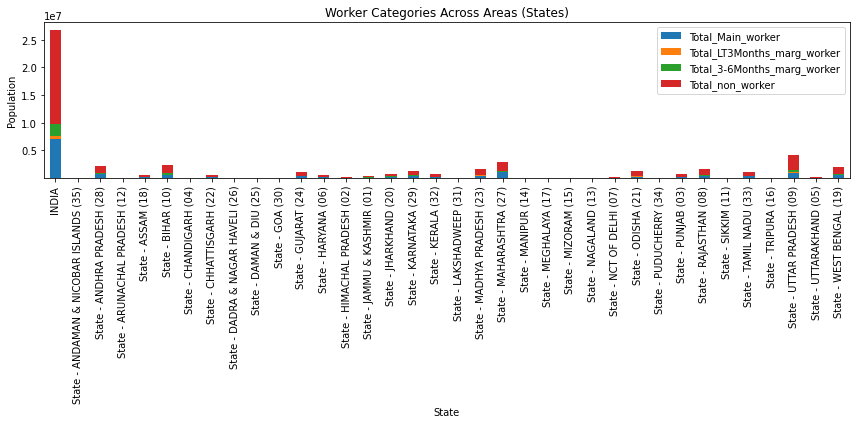

In [8]:
# Group by 'State' and aggregate the worker columns
worker_dis = df_dis_work_a.groupby('Area Name').agg({
    'Total_Main_worker': 'sum',
    'Total_LT3Months_marg_worker': 'sum',
    'Total_3-6Months_marg_worker': 'sum',
    'Total_non_worker': 'sum'
}).reset_index()

# Create a stacked bar plot for the breakdown of workers
worker_dis.set_index('Area Name')[['Total_Main_worker', 'Total_LT3Months_marg_worker', 'Total_3-6Months_marg_worker', 'Total_non_worker']].plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.title('Worker Categories Across Areas (States)')
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


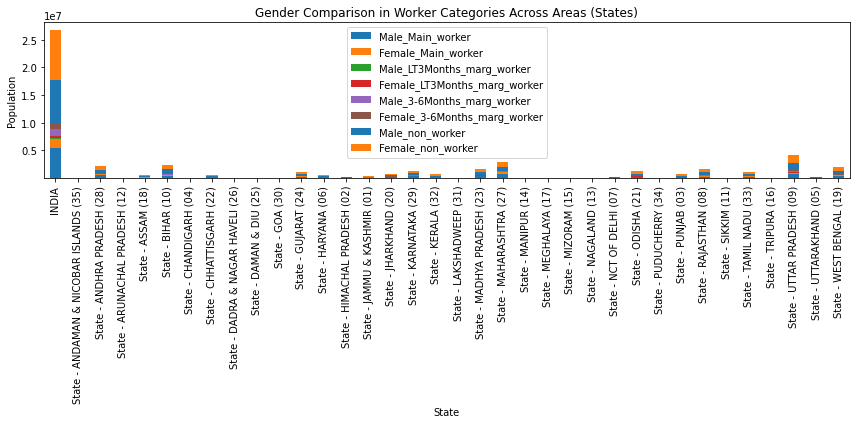

In [9]:
# Group by 'State' and aggregate worker counts by gender
gender_worker_dis = df_dis_work_a.groupby('Area Name').agg({
    'Male_Main_worker': 'sum',
    'Female_Main_worker': 'sum',
    'Male_LT3Months_marg_worker': 'sum',
    'Female_LT3Months_marg_worker': 'sum',
    'Male_3-6Months_marg_worker': 'sum',
    'Female_3-6Months_marg_worker': 'sum',
    'Male_non_worker': 'sum',
    'Female_non_worker': 'sum'
}).reset_index()

# Create a bar plot for gender comparison in different worker categories
gender_worker_dis.set_index('Area Name')[[
    'Male_Main_worker', 'Female_Main_worker', 
    'Male_LT3Months_marg_worker', 'Female_LT3Months_marg_worker', 
    'Male_3-6Months_marg_worker', 'Female_3-6Months_marg_worker', 
    'Male_non_worker', 'Female_non_worker'
]].plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

plt.title('Gender Comparison in Worker Categories Across Areas (States)')
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


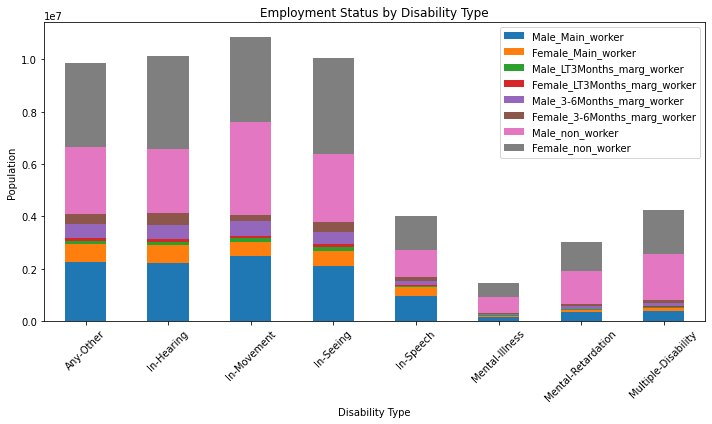

In [10]:
# Group by Disability_Type and get totals
df_dis_work_s = df_dis_work_f[(df_dis_work_f['Area Name'] !='India')]
disability_employment = df_dis_work_s.groupby('Disability')[['Male_Main_worker', 'Female_Main_worker', 'Male_LT3Months_marg_worker',
    'Female_LT3Months_marg_worker',
    'Male_3-6Months_marg_worker',
    'Female_3-6Months_marg_worker',
    'Male_non_worker',
    'Female_non_worker']].sum().reset_index()

# Plot
disability_employment.set_index('Disability')[['Male_Main_worker', 'Female_Main_worker', 'Male_LT3Months_marg_worker',
    'Female_LT3Months_marg_worker',
    'Male_3-6Months_marg_worker',
    'Female_3-6Months_marg_worker',
    'Male_non_worker',
    'Female_non_worker']].plot(
    kind='bar', stacked=True, figsize=(10, 6)
)

plt.title('Employment Status by Disability Type')
plt.xlabel('Disability Type')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


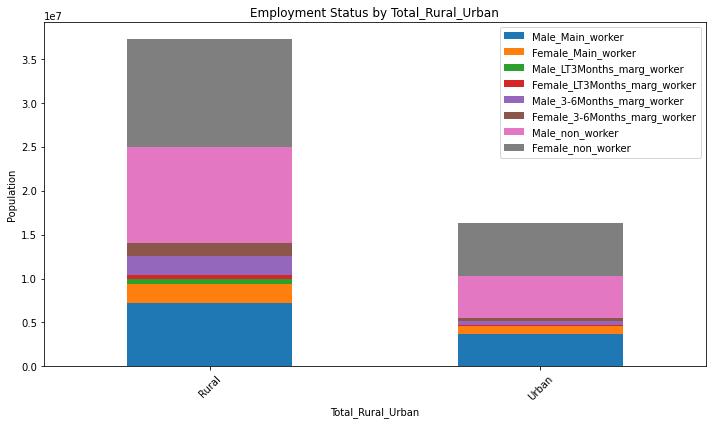

In [11]:
# Group by urban/rural and get totals
disability_employment = df_dis_work_a.groupby('Total_Rural_Urban')[['Male_Main_worker', 'Female_Main_worker', 'Male_LT3Months_marg_worker',
    'Female_LT3Months_marg_worker',
    'Male_3-6Months_marg_worker',
    'Female_3-6Months_marg_worker',
    'Male_non_worker',
    'Female_non_worker']].sum().reset_index()

# Plot
disability_employment.set_index('Total_Rural_Urban')[['Male_Main_worker', 'Female_Main_worker', 'Male_LT3Months_marg_worker',
    'Female_LT3Months_marg_worker',
    'Male_3-6Months_marg_worker',
    'Female_3-6Months_marg_worker',
    'Male_non_worker',
    'Female_non_worker']].plot(
    kind='bar', stacked=True, figsize=(10, 6)
)

plt.title('Employment Status by Total_Rural_Urban')
plt.xlabel('Total_Rural_Urban')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
 df_dis_type_edu_lvl_f = df_dis_type_edu_lvl[(df_dis_type_edu_lvl['Total_Rural_Urban'] !='Total') & (df_dis_type_edu_lvl['Edu_level'] !='Total ')]

In [13]:
# Pivoting df_dis_type_edu_lvl_f to make edu level columnwise
value_columns = ['Total_dis_popln','Male_dis_popln','Female_dis_popln','Seeing_dis_popln','Male_Seeing_popln',
                 'Female_Seeing_popln','Hearing_dis_popln','Male_Hearing_popln','Female_Hearing_popln',
                 'Speech_dis_popln','Male_Speech_popln','Female_Speech_popln','Movement_dis_popln',
                 'Male_Movement_popln','Female_Movement_popln','Mental_ret_dis_popln','Male_Mental_ret_popln',
                 'Female_Mental_ret_popln','Mental_ill_dis_popln','Male_Mental_ill_popln','Female_Mental_ill_popln'
                 ,'Other_dis_popln','Male_Other_popln','Female_Other_popln','Mult_dis_popln','Male_Mult_popln',
                 'Female_Mult_popln']

# Flatten and reorder columns based on original value_columns order
edu_levels = df_dis_type_edu_lvl_f['Edu_level'].unique().tolist()

df_dis_type_edu_lvl_f_pivoted = df_dis_type_edu_lvl_f.pivot_table(
    index=['Area', 'Total_Rural_Urban'],
    columns='Edu_level',
    values=value_columns,
    aggfunc='sum',  
    fill_value=0  # fill missing values with 0
)

# Build column names in desired order
new_columns = []
for val in value_columns:
    for edu in edu_levels:
        col = (val, edu)
        if col in df_dis_type_edu_lvl_f_pivoted.columns:
            new_columns.append(col)

# Reorder and rename columns
df_dis_type_edu_lvl_f_pivoted = df_dis_type_edu_lvl_f_pivoted[new_columns]
df_dis_type_edu_lvl_f_pivoted.columns = [f"{val}_{edu}" for val, edu in new_columns]

# Reset index to get a flat DataFrame
df_dis_type_edu_lvl_f_pivoted = df_dis_type_edu_lvl_f_pivoted.reset_index()

In [14]:
#aggregated the dis edu level file to state level. 
df_dis_type_edu_lvl_f_pivoted_a = df_dis_type_edu_lvl_f_pivoted.groupby('Area').sum(numeric_only=True).reset_index()

In [16]:
#merging df_dis_work_a(aggregated(state, urban/rural) disabled working, marginal working vs non working data 
# +
#same level edu level data.
#merged_df = pd.merge(df_dis_work_a, df_dis_type_edu_lvl_f_pivoted_a, lef on='Area Name', right on='Area',  how='inner')
# Step 1: Add key columns (or reset index)
df_dis_work_a['key'] = 1
df_dis_type_edu_lvl_f_pivoted['key'] = 1

# Step 2: Create all combinations
df_cartesian = pd.merge(df_dis_work_a, df_dis_type_edu_lvl_f_pivoted, on='key').drop('key', axis=1)

# Step 3: Filter where substring matches
df_matched = df_cartesian[
   df_cartesian.apply(lambda row: row['Area'] in row['Area Name'] and row['Total_Rural_Urban_x'] == row['Total_Rural_Urban_y'], axis=1)
]

# Step 3: Optional cleanup
df_matched = df_matched.rename(columns={
    'Total_Rural_Urban_x': 'Total_Rural_Urban'
}).drop(columns=['Total_Rural_Urban_y'])

In [17]:
#df_cartesian.columns
df_matched=

,Area Name,Total_Rural_Urban,State,Distr,Total_dis_popln,Male_dis_popln,Female_dis_popln,Total_Main_worker,Male_Main_worker,Female_Main_worker,...,Male_Mult_popln_Middle but below matric/secondary,Male_Mult_popln_Matric/Secondary but below graduate,Male_Mult_popln_Graduate and above,Female_Mult_popln_Illiterate,Female_Mult_popln_Literate,Female_Mult_popln_Literate but below primary,Female_Mult_popln_Primary but below middle,Female_Mult_popln_Middle but below matric/secondary,Female_Mult_popln_Matric/Secondary but below graduate,Female_Mult_popln_Graduate and above
0,INDIA,Rural,0,0,18636358,10410559,8225799,4709176,3600720,1108456,...,47938,46806,8625,576218,145065,50299,42812,18526,14044,1764
73,INDIA,Urban,0,0,8178636,4578034,3600602,2272833,1864137,408696,...,23360,36998,12606,144346,88357,19938,22401,12340,17738,5629
146,State - ANDAMAN & NICOBAR ISLANDS (35),Rural,1120,0,4880,2834,2046,1155,985,170,...,47,24,1,150,93,24,28,18,14,3
219,State - ANDAMAN & NICOBAR ISLANDS (35),Urban,1120,0,1780,1027,753,525,433,92,...,11,8,3,35,32,9,7,7,6,0
292,State - ANDHRA PRADESH (28),Rural,896,0,1512961,812882,700079,477916,316217,161699,...,2397,4946,802,54084,12854,3333,4681,1335,1837,210


In [18]:
df_matched.to_csv(filepath+fileout_dis_merge, encoding = "utf-8-sig")

In [24]:
df_matched=df_matched[(df_matched['Area Name'] !='INDIA')]

In [25]:
df_matched.shape

(70, 210)

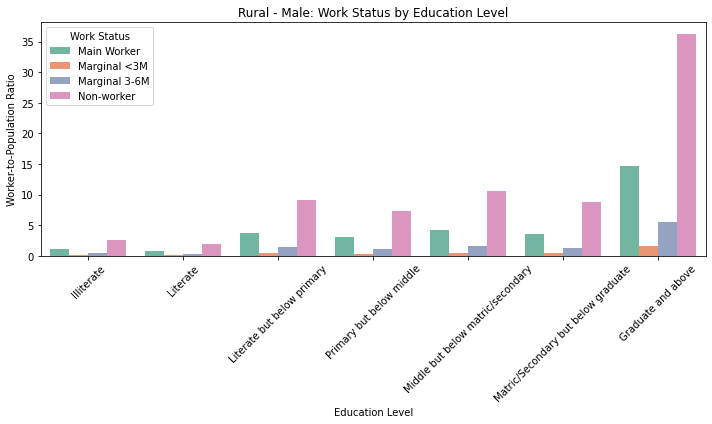

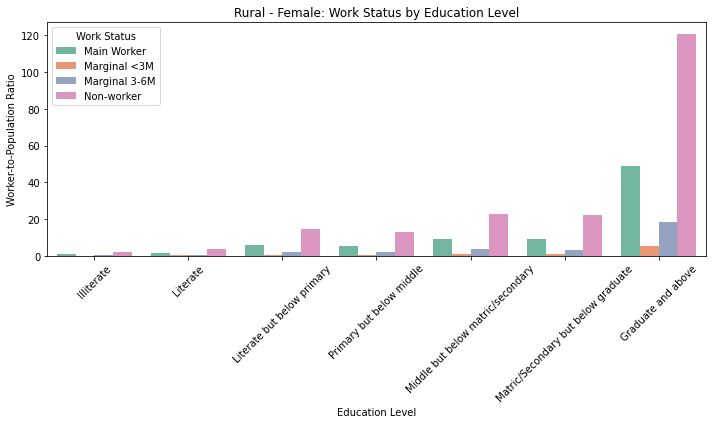

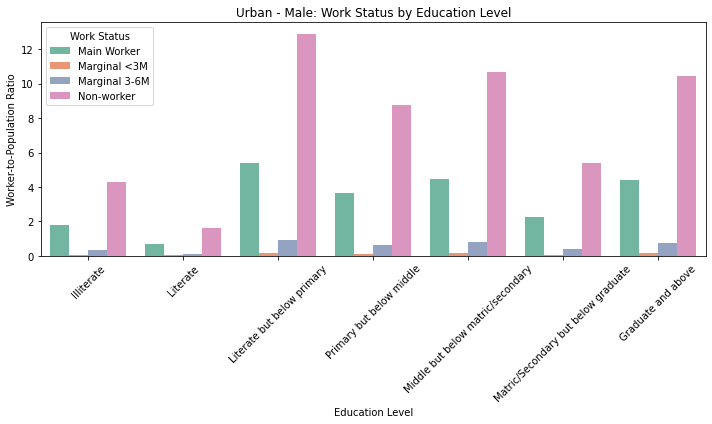

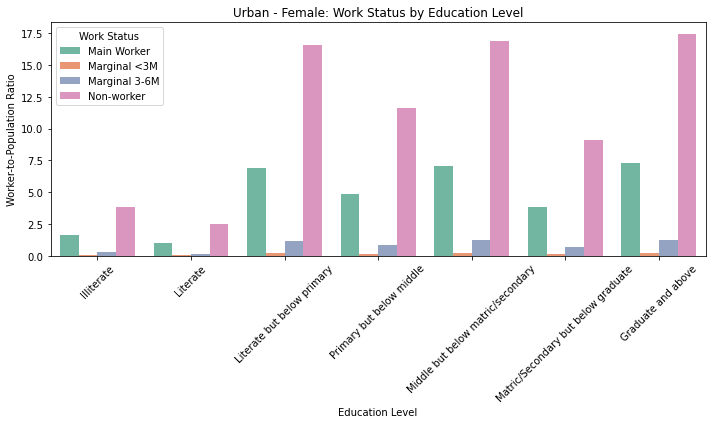

In [26]:
#Education Level vs Work Status (by Gender and Area)
df_matched['Area Type'] = df_matched['Total_Rural_Urban'].apply(lambda x: 'Urban' if 'Urban' in str(x) else 'Rural')

edu_levels = [
    'Illiterate',
    'Literate',
    'Literate but below primary',
    'Primary but below middle',
    'Middle but below matric/secondary',
    'Matric/Secondary but below graduate',
    'Graduate and above'
]

work_status_cols = {
    'Main Worker': 'Total_Main_worker',
    'Marginal <3M': 'Total_LT3Months_marg_worker',
    'Marginal 3-6M': 'Total_3-6Months_marg_worker',
    'Non-worker': 'Total_non_worker'
}

# Prepare plot data
plot_data = []
for area in ['Rural', 'Urban']:
    for gender in ['Male', 'Female']:
        for edu_level in edu_levels:
            pop_col = f"{gender}_dis_popln_{edu_level}"
            for status_name, work_col in work_status_cols.items():
                subset = df_matched[df_matched['Total_Rural_Urban'] == area]
                total_pop = subset[pop_col].sum()
                workers = subset[work_col].sum()
                ratio = workers / total_pop if total_pop else 0
                plot_data.append({
                    'Education Level': edu_level,
                    'Work Status': status_name,
                    'Gender': gender,
                    'Area': area,
                    'Ratio': ratio
                })

plot_df = pd.DataFrame(plot_data)

# Plot each combination separately
for area in ['Rural', 'Urban']:
    for gender in ['Male', 'Female']:
        sub = plot_df[(plot_df['Area'] == area) & (plot_df['Gender'] == gender)]
        plt.figure(figsize=(10, 6))
        sns.barplot(data=sub, x='Education Level', y='Ratio', hue='Work Status', palette='Set2')
        plt.title(f'{area} - {gender}: Work Status by Education Level')
        plt.xticks(rotation=45)
        plt.ylabel("Worker-to-Population Ratio")
        plt.tight_layout()
        plt.show()
